In [5]:
import matplotlib
import torch
import torchvision.models as models
from torch import nn
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import transforms
from torch.autograd import Variable
import numpy as np
import torch.optim as optim

import matplotlib.pyplot as plt

from tools.Tester import ModelNetTester
from tools.ImgDataset import MultiviewImgDataset, SingleImgDataset
from models.MVCNN import MVCNN, SVCNN

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

model1 = SVCNN("cnet1").to(device)
#model1.load_state_dict(torch.load("C:\\Users\\Disruptive\\Documents\\MachineLearning\\results\\mvcnn_stage_1\\mvcnn\\model-00000.pth"))

model2 = MVCNN("cnet2", model1, embedding_layer=-1).to(device)
#model2.load_state_dict(torch.load("C:\\Users\\Disruptive\\Documents\\MachineLearning\\results\\mvcnn_stage_2\\mvcnn\\model-00000.pth"))

val_path = "modelnet40_images_new_12x/*/test"
val_dataset = SingleImgDataset(val_path, scale_aug=False, rot_aug=False, test_mode=True)
print('num_val_files: '+str(len(val_dataset.filepaths)))

get_activation
num_val_files: 29616


In [6]:
model1.eval()
model2.eval()

model = model2
modelName = 'mvcnn'

val_dataset = MultiviewImgDataset(val_path, scale_aug=False, rot_aug=False, num_views=12)

start_item_index = 0
interval = 72
start_batch_index = start_item_index // 1

indices = [i for i in range(len(val_dataset)) if i >= start_batch_index and i % interval == 0]
sampler = SubsetRandomSampler(indices)

#val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=0, sampler=sampler)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=0, sampler=sampler)

trainer = ModelNetTester(model, val_loader, nn.CrossEntropyLoss(), modelName,
                          num_views=1)
print(len(val_loader))
out_data = trainer.test_embedding()
#print(len(out_data[0]))
#trainer.test_accuracy()

35
Loading test # 0
Finished test # 0
Loading test # 1
Finished test # 1
Loading test # 2
Finished test # 2
Loading test # 3
Finished test # 3
Loading test # 4
Finished test # 4
Loading test # 5
Finished test # 5
Loading test # 6
Finished test # 6
Loading test # 7
Finished test # 7
Loading test # 8
Finished test # 8
Loading test # 9
Finished test # 9
Loading test # 10
Finished test # 10
Loading test # 11
Finished test # 11
Loading test # 12
Finished test # 12
Loading test # 13
Finished test # 13
Loading test # 14
Finished test # 14
Loading test # 15
Finished test # 15
Loading test # 16
Finished test # 16
Loading test # 17
Finished test # 17
Loading test # 18
Finished test # 18
Loading test # 19
Finished test # 19
Loading test # 20
Finished test # 20
Loading test # 21
Finished test # 21
Loading test # 22
Finished test # 22
Loading test # 23
Finished test # 23
Loading test # 24
Finished test # 24
Loading test # 25
Finished test # 25
Loading test # 26
Finished test # 26
Loading test # 27


Distances to neighbors: [[0.         0.45088971 0.45728952 0.54672927 0.58980018]]
Indices of neighbors: [[ 0 27  6  4 14]]


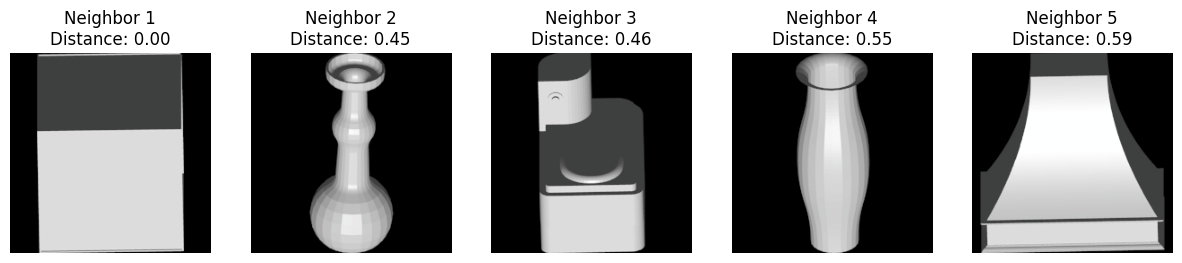

Distances to neighbors: [[0.         0.32986587 0.45604602 0.4662987  0.5319922 ]]
Indices of neighbors: [[ 1 16 15 29 28]]


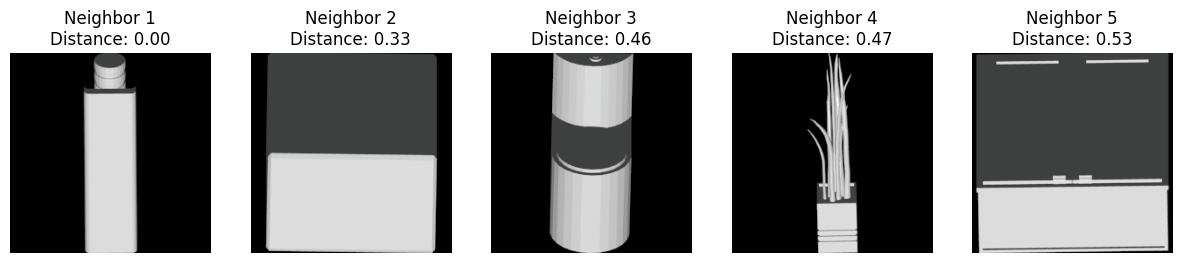

Distances to neighbors: [[0.         0.59748363 0.63242233 0.66162694 0.67557377]]
Indices of neighbors: [[ 2  6  0 25  1]]


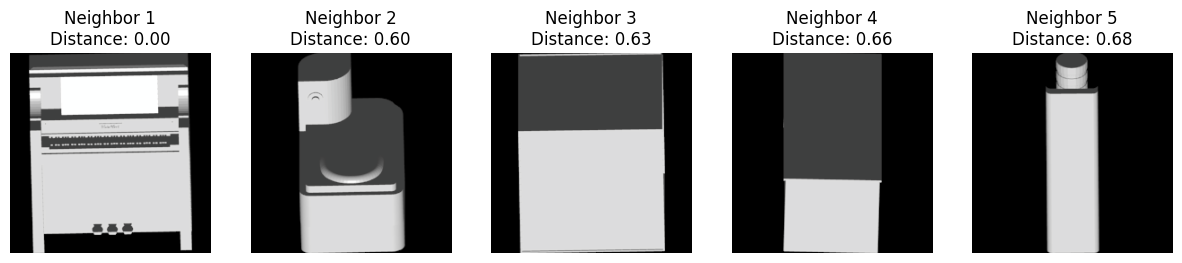

Distances to neighbors: [[1.49011612e-08 7.26468265e-01 7.51283765e-01 8.57743204e-01
  8.60033989e-01]]
Indices of neighbors: [[ 3 29 14 15 10]]


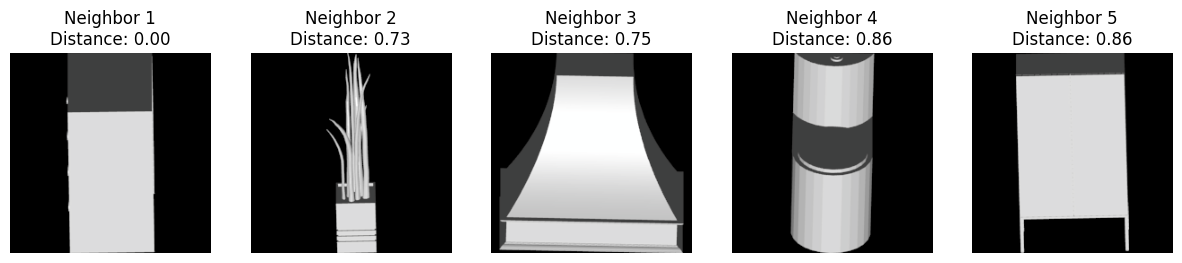

Distances to neighbors: [[1.49011612e-08 5.46729267e-01 5.95271468e-01 6.09909654e-01
  6.99297190e-01]]
Indices of neighbors: [[ 4  0  6 27 15]]


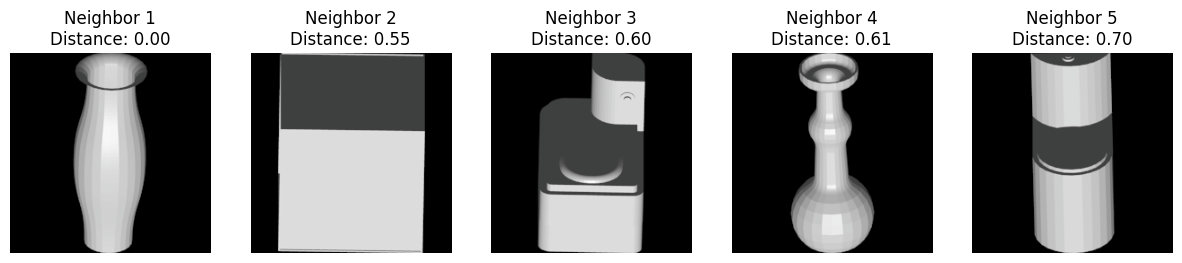

Distances to neighbors: [[0.         0.63748133 0.8942768  0.96620023 0.96639848]]
Indices of neighbors: [[ 5 20 24 22 11]]


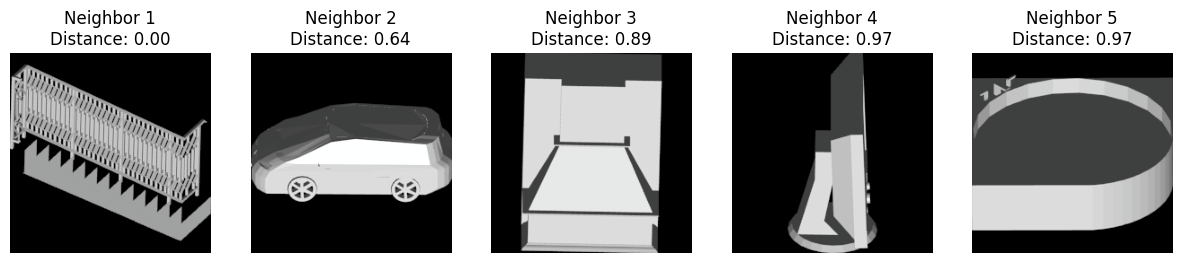

Distances to neighbors: [[0.         0.45728952 0.47221839 0.4959062  0.54633355]]
Indices of neighbors: [[ 6  0 27 25  1]]


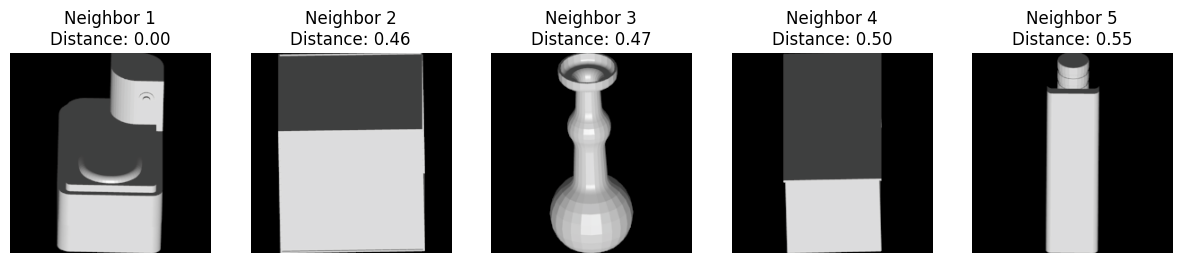

Distances to neighbors: [[0.         0.88246065 0.89670783 0.90951657 0.93265986]]
Indices of neighbors: [[ 7 13  8 24 12]]


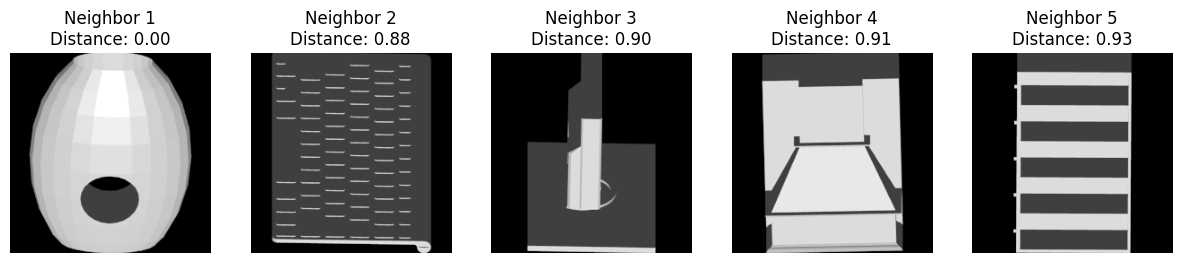

Distances to neighbors: [[0.         0.65307325 0.68787146 0.7279886  0.7420674 ]]
Indices of neighbors: [[ 8 25  1 16  6]]


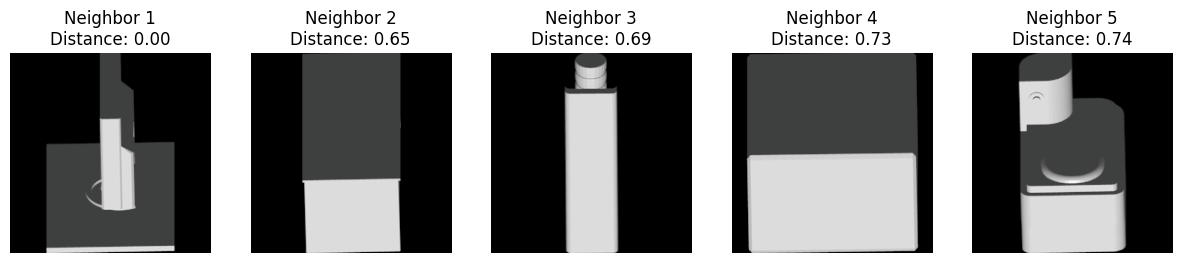

Distances to neighbors: [[0.         0.74873626 0.77451468 0.81332523 0.83475035]]
Indices of neighbors: [[ 9  4  6 33 25]]


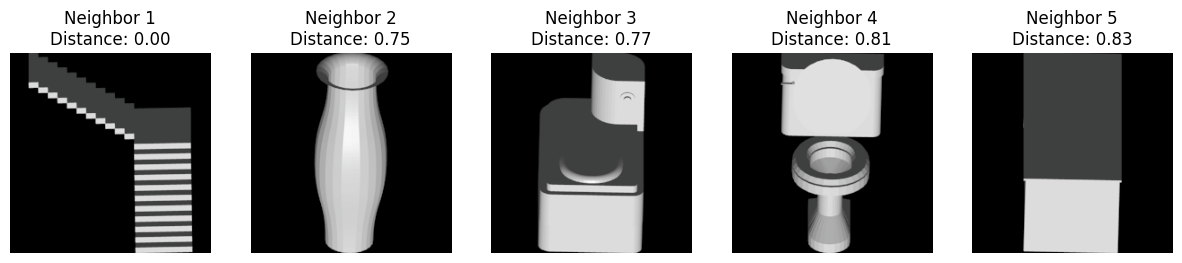

Distances to neighbors: [[0.         0.61893284 0.68878335 0.72966319 0.73267609]]
Indices of neighbors: [[10 15 29  0 16]]


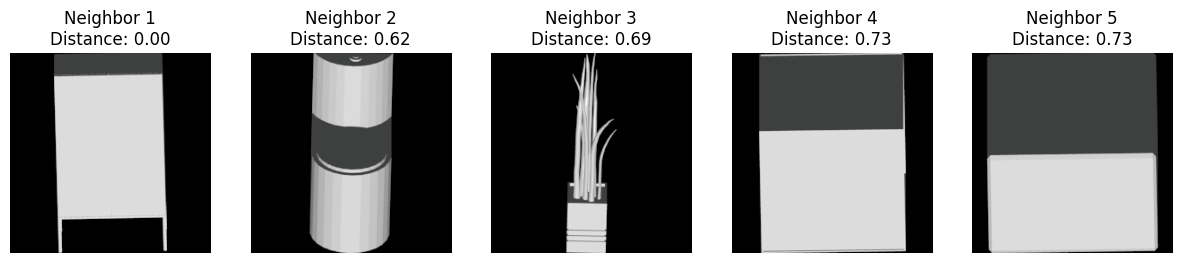

Distances to neighbors: [[2.10734239e-08 8.76335740e-01 8.88672888e-01 9.58094656e-01
  9.66398478e-01]]
Indices of neighbors: [[11 23 21 15  5]]


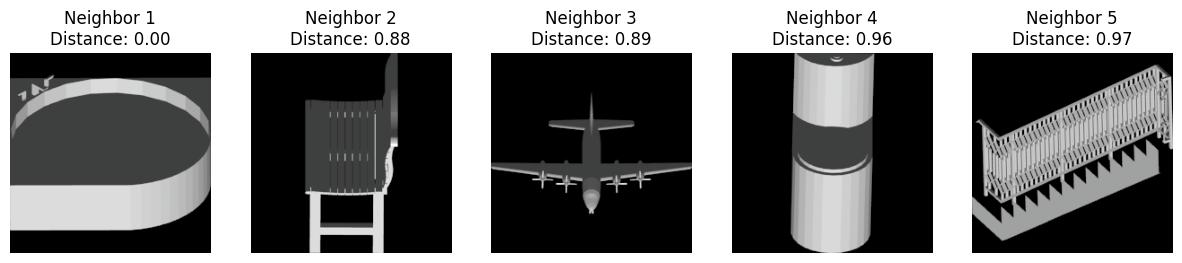

Distances to neighbors: [[0.         0.65929478 0.73294067 0.73936516 0.73949552]]
Indices of neighbors: [[12 15 27 21  4]]


KeyboardInterrupt: 

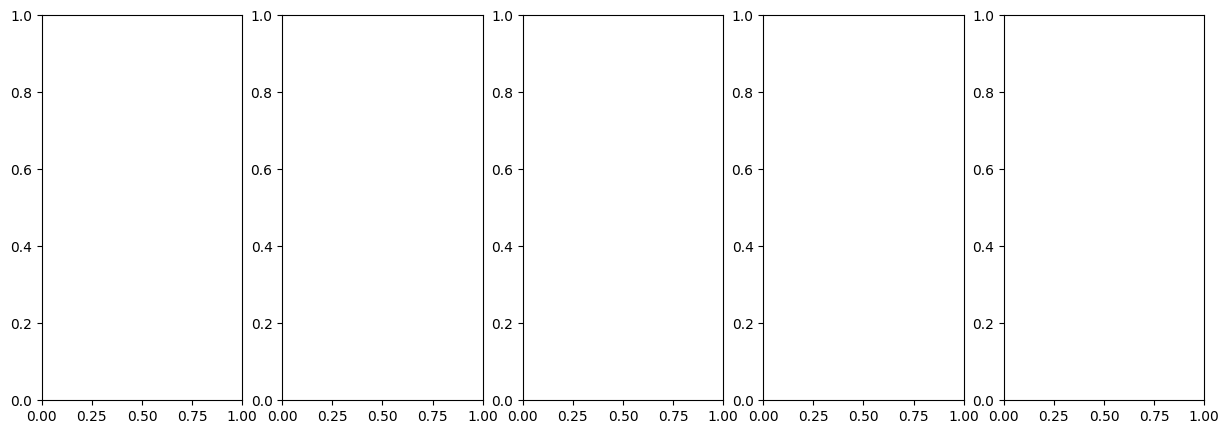

In [7]:
from sklearn.neighbors import NearestNeighbors

embeddings = torch.cat(out_data[0], dim=0)

nn1 = NearestNeighbors(n_neighbors=5, algorithm='auto')
embeddings = embeddings / embeddings.norm(dim=1)[:, None]
embeddings = embeddings.cpu().numpy()
nn1.fit(embeddings)

for datapoint in embeddings:
    distances, indices = nn1.kneighbors([datapoint])

    print("Distances to neighbors:", distances)
    print("Indices of neighbors:", indices)

    fig, axes = plt.subplots(1, len(indices[0]), figsize=(15, 5))  # Adjust size as needed
    for j, index in enumerate(indices[0]):
        _, images, _ = val_dataset[out_data[1][index]]

        img_tensor = images[0]  # Taking the first view
        img_tensor = img_tensor.permute(1, 2, 0)  # CxHxW to HxWxC
        img_tensor = img_tensor.numpy()
        img_tensor = (img_tensor * np.array([0.229, 0.224, 0.225])) + np.array([0.485, 0.456, 0.406])  # Unnormalize
        img_tensor = np.clip(img_tensor, 0, 1)  # Ensure values are within [0, 1] for valid image display

        axes[j].imshow(img_tensor)
        axes[j].axis('off')  # Hide axes
        axes[j].set_title(f'Neighbor {j+1}\nDistance: {distances[0][j]:.2f}')

    plt.show()
